In [1]:
# Loading Basic Modules to perform any Machine Learning task

import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

This is a Normal image of Brain without any Tumor


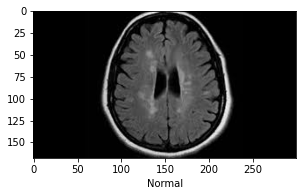

In [2]:
# Normal Brain Image looks like

from keras.preprocessing.image import load_img
fig = plt.figure(figsize=(16,8))
img_no = load_img(r'C:\Users\singhegm\Downloads\Brain Tumor\brain tumor dataset\No\No.11.jpg')
normal = fig.add_subplot(1,3,2)
print("This is a Normal image of Brain without any Tumor")
plt.imshow(img_no)
normal.set_xlabel("Normal")
plt.show()

This image shows Brain Tumor


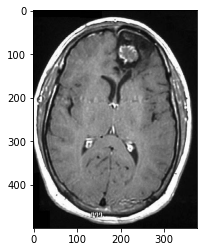

In [3]:
# now let us see how a Tumor Image looks like

img_yes = load_img(r'C:\Users\singhegm\Downloads\Brain Tumor\brain tumor dataset\Yes\Yes. 11.jpg')
Tumor = fig.add_subplot(1,3,1)
print("This image shows Brain Tumor")
plt.imshow(img_yes)
Tumor.set_xlabel('Tumor')
plt.show()

In [4]:
path = r"C:\Users\singhegm\Downloads\Brain Tumor"
list(os.listdir(path))

['2M Invoice Sample 1.pdf',
 'Acounting Voucher(2) (1).pdf',
 'Approved List Of Vendors.pdf',
 'Brain MRI Scan Image.png',
 'brain tumor dataset',
 'BrainTumor1.pdf',
 'BrainTumor2.pdf',
 'BrainTumor3.pdf',
 'Cello Appliances Invoice scan copy.pdf',
 'EE INVOICE7 Sample 1.pdf',
 'ent earth lego invoice_Harish.pdf',
 'Invoice # 13121-1558267-2869725.pdf',
 'Invoice (1).pdf',
 'MAA TARENI AGENCY Sebamed Bill.pdf',
 'purchase invoice.pdf',
 'results files',
 'sebamed bill 10-6.pdf',
 'submission.csv',
 'Tax Invoice Hanumat Drug Agency 193(1).pdf',
 'Testing',
 'Training',
 'tumor.h5']

In [5]:
list(os.listdir(path + "/Training"))

['glioma tumor', 'meningioma tumor', 'no tumor', 'pituitary tumor']

In [6]:
list(os.listdir(path + "/Testing"))

['glioma tumor', 'meningioma tumor', 'no tumor', 'pituitary tumor']

In [7]:
# Map each type as label

labels = ['glioma tumor','no tumor','meningioma tumor','pituitary tumor']

# Assign each label to number

label_mapped = {
    'no tumor': 0,
    'glioma tumor': 1,
    'meningioma tumor': 2,
    'pituitary tumor': 3
}

# now we assign the labels to nos. for computation purpose

inverse_label_mapped = {
    0: 'no tumor',
    1: 'glioma tumor',
    2: 'meningioma tumor',
    3: 'pituitary tumor'
}

In [8]:
from tqdm import tqdm
import cv2

IMAGE = []
LABELS = []
height, width = 224, 224

In [9]:
for label in labels:
    folderPath = os.path.join(r'C:\Users\singhegm\Downloads\Brain Tumor\Training', label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(height, width))
        IMAGE.append(img)
        LABELS.append(label_mapped[label])

100%|███████████████████████████████████████████████████████████████████████████████| 827/827 [00:04<00:00, 176.03it/s]


In [10]:
for label in labels:
    folderPath = os.path.join(r'C:\Users\singhegm\Downloads\Brain Tumor\Testing', label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(height, width))
        IMAGE.append(img)
        LABELS.append(label_mapped[label])

100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 99.75it/s]


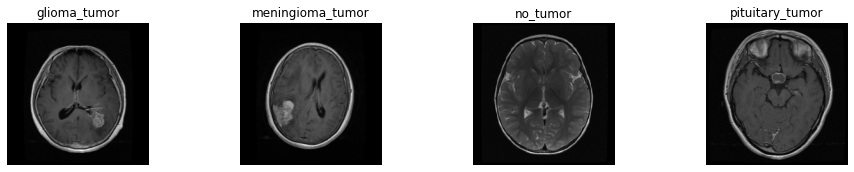

In [11]:
# Lets pick a random image from each label type and view them

import matplotlib.image as mpimg

plt.figure(figsize=(16, 12))

path = r'C:\Users\singhegm\Downloads\Brain Tumor\Training'
fileNames = ['/glioma tumor/gg (10).jpg', '/meningioma tumor/m (108).jpg', 
             '/no tumor/image (16).jpg', '/pituitary tumor/p (12).jpg']
fileLabels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in range(4):
    ax = plt.subplot(4, 4, i + 1)
    img = mpimg.imread(path + fileNames[i])
    img = cv2.resize(img, (height, width))
    plt.imshow(img)
    plt.title(fileLabels[i])
    plt.axis("off")

In [12]:
# Set Hyperparameters

#set dimenstion for images
img_height = 256
img_width = 256
epochs = 50
batch_size = 1
input_shape = (img_width, img_height, 3)

In [13]:
# Data_augmentation

from keras.preprocessing.image import ImageDataGenerator

# Train_data_augmentation
train_datagen = ImageDataGenerator(rescale = 1.0 / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Test_data_augmentation, only rescaling data for test_set
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [14]:
# We will train the model using all the images or complete folder

train_dir = r"C:\Users\singhegm\Downloads\Brain Tumor\brain tumor dataset"

# Divide complete dataset into Train and Validation set for training and validating our Model

train_generator = train_datagen.flow_from_directory( train_dir,
                                                    target_size = (img_width, img_height),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [15]:
# We are using only 25% of images for validation

validation_generator = test_datagen.flow_from_directory(train_dir,
                                                        target_size = (img_width, img_height),
                                                        batch_size = 8,
                                                        class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [16]:
# Now, lets build our 3-layered CNN model for Image Classification

import tensorflow as tf
import keras

model1 = tf.keras.models.Sequential([# Convolution1
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
    
                                    # Convolution2
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
    
                                    # Convolution3
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
    
                                    # Flattening the o/p layer
                                    tf.keras.layers.Flatten(),
    
                                    # 128 dense layers for i/p and 1 o/p layer
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0

In [18]:
# We are using Adam optimizer with Binary Cross Entropy Loss function for optimizing our Model

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Lets fit our model with the dataset and train it with running few epochs

history1 = model1.fit(train_generator, epochs = epochs, validation_data = validation_generator, verbose = 1)

Epoch 1/50
253/253 [==============================] - 46s 181ms/step - loss: 0.8012 - accuracy: 0.6561 - val_loss: 0.6186 - val_accuracy: 0.7628
Epoch 2/50
253/253 [==============================] - 67s 267ms/step - loss: 0.6872 - accuracy: 0.6996 - val_loss: 0.6136 - val_accuracy: 0.7233
Epoch 3/50
253/253 [==============================] - 47s 188ms/step - loss: 0.6399 - accuracy: 0.6877 - val_loss: 0.5393 - val_accuracy: 0.7549
Epoch 4/50
253/253 [==============================] - 42s 167ms/step - loss: 0.5954 - accuracy: 0.7312 - val_loss: 0.4947 - val_accuracy: 0.7866
Epoch 5/50
253/253 [==============================] - 53s 210ms/step - loss: 0.5981 - accuracy: 0.7036 - val_loss: 0.4644 - val_accuracy: 0.8063
Epoch 6/50
253/253 [==============================] - 51s 200ms/step - loss: 0.6175 - accuracy: 0.7036 - val_loss: 0.4779 - val_accuracy: 0.7826
Epoch 7/50
253/253 [==============================] - 49s 195ms/step - loss: 0.6020 - accuracy: 0.6917 - val_loss: 0.6750 - val_ac

In [20]:
# Accuracy of our model on the validation test after training 

accuracy1 = model1.evaluate(validation_generator)
accuracy1[1]

32/32 [==============================] - 6s 183ms/step - loss: 0.1228 - accuracy: 0.9644


0.9644268751144409

In [21]:
# We have 2 folders in our dataset : folder 0 - Not Tumor/Normal Brain Image, folder 1 - Brain Tumor Image

def names(result_folder):
    if result_folder == 0:
        return 'No, Its not a Tumor'
    else:
        return 'Yes, Its a Tumor'

Predicted imaage contains Brain Tumor? : Yes, Its a Tumor


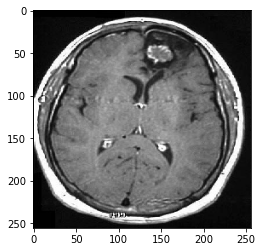

In [22]:
from tensorflow.keras.preprocessing import image

img_op = image.load_img(r'C:\Users\singhegm\Downloads\Brain Tumor\brain tumor dataset\Yes\Yes. 11.jpg', 
                            target_size = (256, 256))
plt.imshow(img_op)
img_op = image.img_to_array(img_op)
img_op = np.expand_dims(img_op, axis = 0)
result = model1.predict(img_op)
train_generator.class_indices

print("Predicted imaage contains Brain Tumor? :", names(result))

Predicted imaage contains Brain Tumor? : No, Its not a Tumor


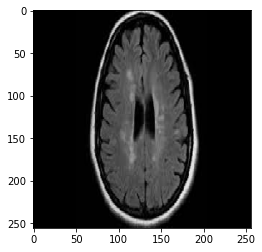

In [23]:
from tensorflow.keras.preprocessing import image

img_op = image.load_img(r'C:\Users\singhegm\Downloads\Brain Tumor\brain tumor dataset\No\No.11.jpg', 
                            target_size = (256, 256))
plt.imshow(img_op)
img_op = image.img_to_array(img_op)
img_op = np.expand_dims(img_op, axis = 0)
result = model1.predict(img_op)
train_generator.class_indices

print("Predicted imaage contains Brain Tumor? :", names(result))

In [24]:
# Now lets store the Images and labels in a variable for building our model

X = np.array(IMAGE)
y = np.array(LABELS)

In [25]:
# Divide dataset into train and test samples

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical

In [26]:
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size = 0.1, random_state = 42)

In [27]:
from keras.applications import VGG16

base_model = VGG16(input_shape = (height, width, 3), 
                   weights = 'imagenet',
                   include_top = False, 
                   pooling = 'max')

In [28]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [29]:
# Set the no. of output class of the model

base_model.trainable = False
output_class = 4

In [30]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

model2 = Sequential([base_model, 
                    Dropout(rate = 0.5),
                    Dense(output_class, activation = 'softmax')])

In [31]:
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
# Image data Augmentation

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

In [33]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor = 'val_loss', patience = 5)

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', 
                                            patience = 2, 
                                            verbose = 1, 
                                            factor = 0.5, 
                                            min_lr = 1)

callbacks = [earlystop, learning_rate_reduction]

In [34]:
history2 = model2.fit(datagen.flow(X_train, y_train, batch_size = batch_size), validation_data = (X_test, y_test),
                    steps_per_epoch = len(X_train) / batch_size, epochs = epochs, callbacks = callbacks)

Epoch 1/50
2938/2938 [==============================] - 1285s 437ms/step - loss: 1.3294 - accuracy: 0.4663 - val_loss: 96.1862 - val_accuracy: 0.2813
Epoch 2/50
2938/2938 [==============================] - 1193s 406ms/step - loss: 1.0507 - accuracy: 0.5640 - val_loss: 120.0202 - val_accuracy: 0.2722
Epoch 3/50
2938/2938 [==============================] - 1186s 404ms/step - loss: 0.9825 - accuracy: 0.6140 - val_loss: 139.3746 - val_accuracy: 0.2569
Epoch 4/50
2938/2938 [==============================] - 1193s 406ms/step - loss: 0.9941 - accuracy: 0.6021 - val_loss: 138.3546 - val_accuracy: 0.3700
Epoch 5/50
2938/2938 [==============================] - 1233s 420ms/step - loss: 0.9962 - accuracy: 0.6164 - val_loss: 216.9514 - val_accuracy: 0.2171
Epoch 6/50
2938/2938 [==============================] - 1352s 460ms/step - loss: 0.9804 - accuracy: 0.6157 - val_loss: 167.3834 - val_accuracy: 0.3119


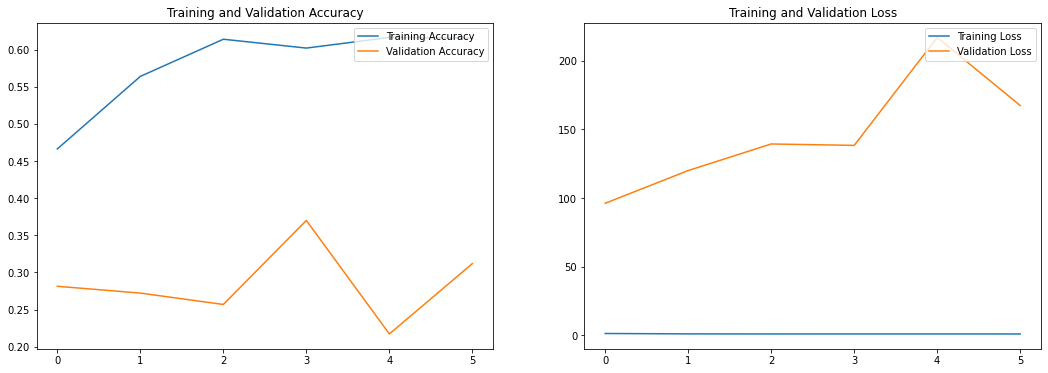

In [35]:
# Accuracy of our model on the validation test after training 

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(len(history2.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history2.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
predicted_labels = model2.predict(X_test)
print(predicted_labels[:5])

[[1.0000000e+00 0.0000000e+00 1.5880315e-35 0.0000000e+00]
 [9.9565804e-01 1.4253909e-33 4.3419865e-03 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 6.5889200e-26 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [37]:
predicted_labels = [np.argmax(i) for i in predicted_labels]
print(predicted_labels[:5])

[0, 0, 0, 0, 0]


In [38]:
predicted_labels = [np.argmax(i) for i in predicted_labels]
print(predicted_labels[:5])

[0, 0, 0, 0, 0]


In [39]:
original_labels =[np.argmax(i) for i in y_test]
print(original_labels[:5])

[3, 1, 2, 3, 1]


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

conf_mat = confusion_matrix(original_labels, predicted_labels)
report = classification_report(original_labels, predicted_labels)

print('Confusion Matrix ==>')
print(conf_mat)
print('----------------------------------------------------------------------------------------')
print('Classification Report ==>')
print(report)

Confusion Matrix ==>
[[58  0  0  0]
 [97  0  0  0]
 [92  0  0  0]
 [80  0  0  0]]
----------------------------------------------------------------------------------------
Classification Report ==>
              precision    recall  f1-score   support

           0       0.18      1.00      0.30        58
           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        80

    accuracy                           0.18       327
   macro avg       0.04      0.25      0.08       327
weighted avg       0.03      0.18      0.05       327



C:\Users\singhegm\Anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singhegm\Anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singhegm\Anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
predicted_labels = [inverse_label_mapped[x] for x in predicted_labels]
print(predicted_labels[:5])

['no tumor', 'no tumor', 'no tumor', 'no tumor', 'no tumor']


In [42]:
# https://braininformatics.springeropen.com/articles/10.1007/s40708-017-0075-5

y_test_edit = np.argmax(y_test , axis = 1)

In [43]:
predictions2 = model2.predict(X_test)
predictions2 = np.argmax(predictions2, axis = 1)

<AxesSubplot:>

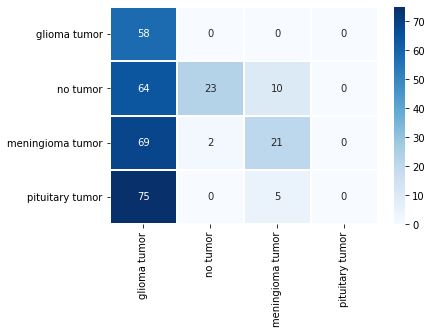

In [44]:
import sklearn
import seaborn as sns

cf_matrix = sklearn.metrics.confusion_matrix(y_test_edit, predictions2)
sns.heatmap(cf_matrix, cmap = 'Blues', linewidth = 1, annot = True, xticklabels=labels, yticklabels=labels)

In [45]:
# Classification report.
cf_report = sklearn.metrics.classification_report(y_test_edit, predictions2 )
print(cf_report)

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        58
           1       0.92      0.24      0.38        97
           2       0.58      0.23      0.33        92
           3       0.00      0.00      0.00        80

    accuracy                           0.31       327
   macro avg       0.43      0.37      0.27       327
weighted avg       0.48      0.31      0.27       327



C:\Users\singhegm\Anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singhegm\Anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singhegm\Anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Evaluating Model.
result1 = model2.evaluate(X_test, y_test)
print("Testing Loss :", result1[0])
print("Testing Accuracy :", result1[1]*100, "%")

11/11 [==============================] - 103s 9s/step - loss: 167.3834 - accuracy: 0.3119
Testing Loss : 167.3833770751953
Testing Accuracy : 31.192660331726074 %
